## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(9, 9)

from sklearn.impute import KNNImputer

In [2]:
try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('/datasets/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**ВЫВОД:**  
Признаки с пропусками:
`days_employed`, `total_income`. Оба количественные.


Познакомимся с датасетом, посмотрим его первые десять строк.

In [3]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Посмотрим на уникальные значения категориальных признаков

In [4]:
for feat in data.select_dtypes(include='object').columns:
    print(f"Значения в столбце {feat}: {data[feat].unique()}\n")

Значения в столбце education: ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']

Значения в столбце family_status: ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

Значения в столбце gender: ['F' 'M' 'XNA']

Значения в столбце income_type: ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']

Значения в столбце purpose: ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автом

**ВЫВОДЫ:**  
1) В столбце education есть неявные дубликаты. Необходимо привести все значения к нижнему регистру.  
2) В столбце gender есть артефакт - XNA. Возможно, так кодируются пропуски в этом признаке.  

Проверим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками

In [5]:
print(f"Доля пропусков в столбце days_employed: {data[data['days_employed'].isna()].shape[0] / data.shape[0]}")
print(f"Доля пропусков в столбце total_income:  {data[data['total_income'].isna()].shape[0] / data.shape[0]}")

Доля пропусков в столбце days_employed: 0.10099883855981417
Доля пропусков в столбце total_income:  0.10099883855981417


Одинаковое значение.  
Проверим есть ли взаимосвязь между пропусками в этих столбцах.

In [6]:
data[(data['total_income'].isna()) ^ (data['days_employed'].isna())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Пустой датафрейм означает, что не существует объектов, для которых был бы пропущен только один признак, но не оба сразу. Таким образом, для всех клиентов, о которых мы не знаем стаж, мы не знаем и ежемесячный доход. И наоборот.  
  
Убедимся на 10 случайных примерах

In [7]:
data[(data['total_income'].isna())].sample(10).loc[:, ['days_employed', 'total_income']]

,days_employed,total_income
16779,NaN,NaN
6697,NaN,NaN
18670,NaN,NaN
11375,NaN,NaN
9080,NaN,NaN
7025,NaN,NaN
16602,NaN,NaN
14800,NaN,NaN
18140,NaN,NaN
19382,NaN,NaN


**ВЫВОД:**  
Значит отсутствие одного признака является следствием отсутствия другого.  
Возможно, в данных учитывается только **официальное** трудоустройство. Тогда люди, которые никогда не работали официально, не имеют ежемесячного дохода.

## Заполнение пропусков

Рассмотрим распределения значений количественных пизнаков с пропусками

In [8]:
# бэкап для проведения экспериментов
backup = data.copy()

### НОЛЬ
Для начала заполним пропуски простейшим способом - специальным значением, например, нулем.

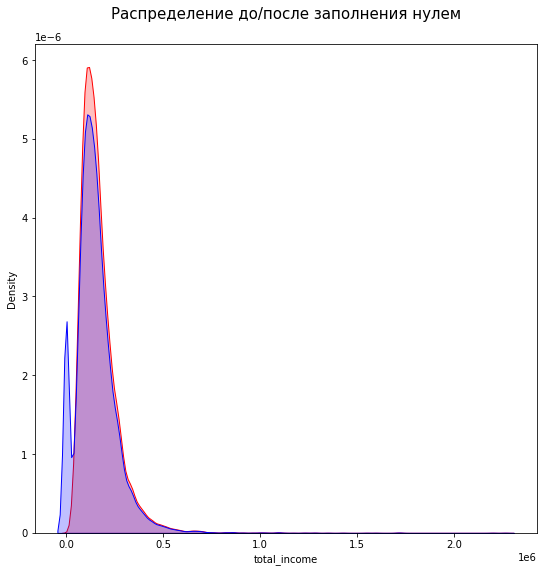

In [9]:
data = backup.copy()

plt.title('Распределение до/после заполнения нулем', pad=25, fontsize=15);
sns.kdeplot(data['total_income'], color='red', fill=True);
data['total_income'] = data['total_income'].fillna(0)
sns.kdeplot(data['total_income'], color='blue', fill=True);

### СРЕДНЕЕ
Попробуем заоплнение средним значением признака.

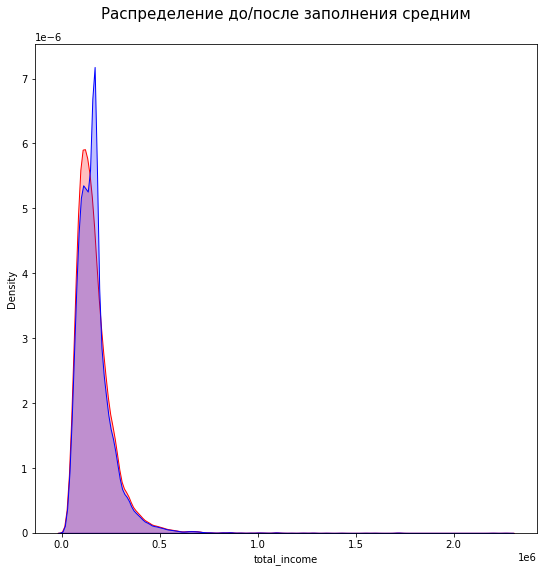

In [10]:
data = backup.copy()

plt.title('Распределение до/после заполнения средним', pad=25, fontsize=15);
sns.kdeplot(data['total_income'], color='red', fill=True);
data['total_income'] = data['total_income'].fillna(data['total_income'].mean())
sns.kdeplot(data['total_income'], color='blue', fill=True);

### МЕДИАНА
Попробуем заполнить медианой.

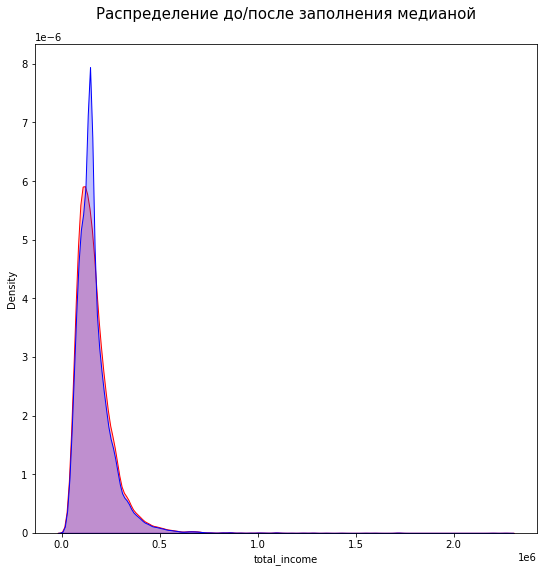

In [11]:
data = backup.copy()

plt.title('Распределение до/после заполнения медианой', pad=25, fontsize=15);
sns.kdeplot(data['total_income'], color='red', fill=True);
data['total_income'] = data['total_income'].fillna(data['total_income'].median())
sns.kdeplot(data['total_income'], color='blue', fill=True);

**ВЫВОДЫ:**

1. Заполнение пропусков специальным значением (нулем) не имеет под собой логических основнований, приводит к смещению распределения, созданию бимодальности распределения и в какой-то мере противоречит смыслу признака.  
2. Заполнение средним не подходит для этой задачи, потому что распределение имеет тяжелый правый хвост, что говорит о наличии больших значений признака - выбросов. В таком случае среднее также смещено в сторону выборосов. Заполнение этим способом искажает, смещает данные, содает второй пик (бимодальность).  
3. Заполнение пропусков медианой - хорошее решение, потому что эта статистика устойчива к выбросам; такое заполнение оправдано смыслом признака и задачи.  
  
Но это решение не лучшее, потому что оно, как видно на диаграмме выше, тоже приводит к смещению распределния данных (небольшому по сравнению с другими способами), что в свою очередь сказывается на результатах исследования.   
  
Предлагаю использовать другой способ - заполнение пропусков методом k-ближайщих соседей.  
Для его корректной работы необходимо, чтобы все данные были числового типа. Оставим только числовые признаки кроме debt (чтобы не было утечки данных) и days_employed (потому что по заданию заполнить пропуски в нем нам предстоит позднее).

### KNNImputer

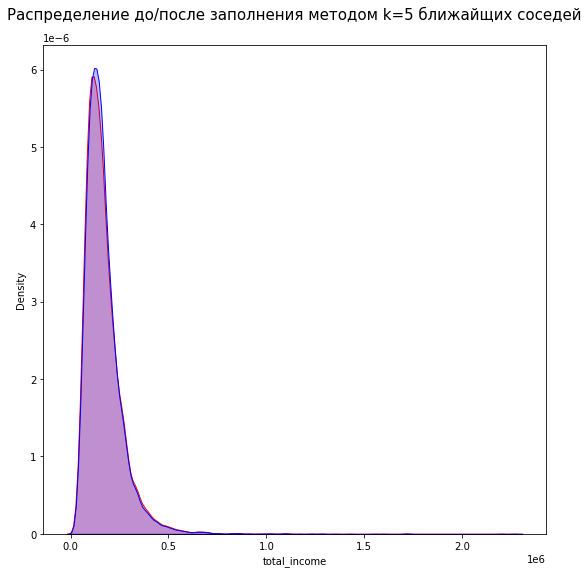

In [12]:
data = backup.copy()

knn_imp = KNNImputer(weights='distance')

tmp_data = data.select_dtypes(exclude='object').drop(['debt', 'days_employed'], axis=1)

plt.title('Распределение до/после заполнения методом k=5 ближайщих соседей', pad=25, fontsize=15);
sns.kdeplot(data['total_income'], color='red', fill=True);
data[tmp_data.columns] = pd.DataFrame(knn_imp.fit_transform(tmp_data), columns=tmp_data.columns)
sns.kdeplot(data['total_income'], color='blue', fill=True);

Смещение сведено к минимуму.  
**ВЫВОД:**  
Таким образом, заполнение пропусков методом KNN я считаю наиболее удачным в данной задаче.

## Проверка данных на аномалии и исправления.

Рассмотрим признак `days_employed`

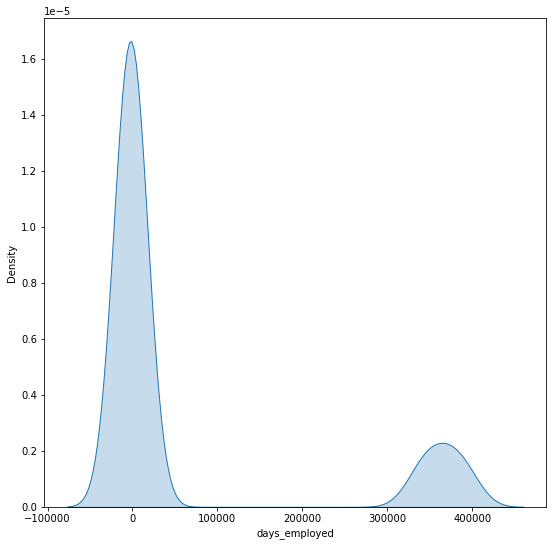

In [13]:
sns.kdeplot(data['days_employed'], fill=True);

Рассмотритм поближе каждое "скопление"

### ОТРИЦАТЕЛЬНЫЙ СТАЖ

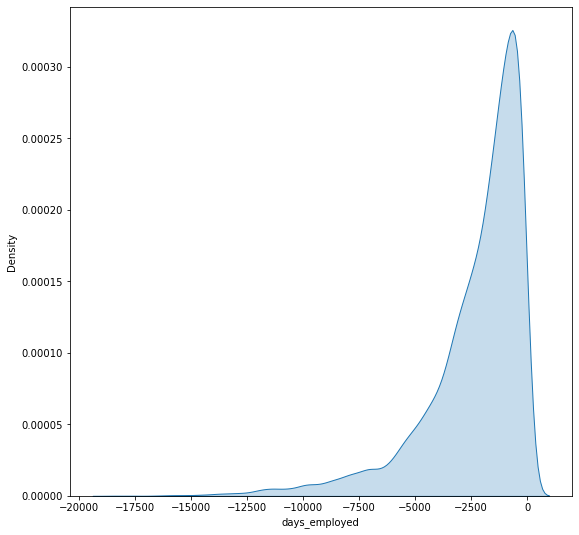

In [14]:
sns.kdeplot(data[data['days_employed'] < 200000]['days_employed'], fill=True);

Признак принимает значение от нуля до приблизительно -20 000. Очевидно, что проработать отрицательное количество дней в нашем мире невозможно.  
Оценим на адекватность абсолютные значения трудового стажа.

In [15]:
print(f"""Наибольший стаж для рассматриваемого "скопления": {abs(data['days_employed'].min()) / 365.5:.2f} лет""")

Наибольший стаж для рассматриваемого "скопления": 50.31 лет


50 лет. Внушительно, но вполне возможно.  
  
**ВЫВОД:**  
Причиной возникновения такой ошибки может быть тот факт, что систему подсчета рабочих дней ввели, когда человек уже работал в компании. А стаж рассчитывается по формуле "**дата начала работы - текущая дата = трудовой стаж**". В таком случае "**дата начала работы**" будет меньше и, следовательно, стаж будет отрицательный.  

**РЕШЕНИЕ:**  
Таким образом, предположу, что стаж в этом "скоплении" нужно просто взять по модулю.  
  
Для новых сотрудников такой проблемы нет, но, кажется, есть другая.  
Рассмотрим поближе.

### СТАЖ 1000 ЛЕТ

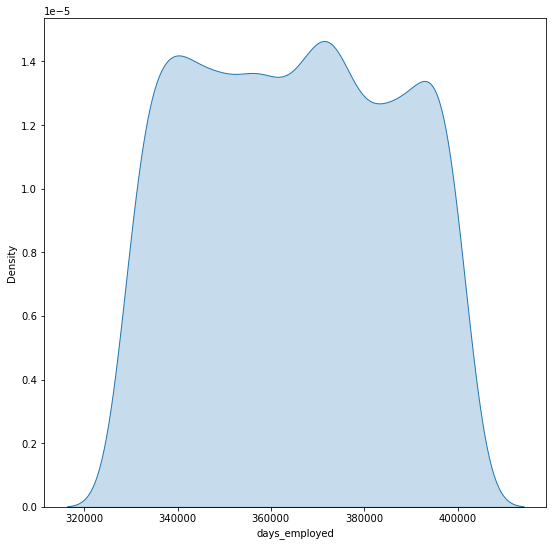

In [16]:
sns.kdeplot(data[data['days_employed'] > 200000]['days_employed'], fill=True);

Интересное распределение. Равномерное.  
Минимальное значение в районе 330 000 дней, максимальное - 400 000 дней.  
Оценка на адекватность:

In [17]:
print(f"""Наибольший стаж для рассматриваемого "скопления": {abs(data['days_employed'].max()) / 365.5:.2f} лет""")

Наибольший стаж для рассматриваемого "скопления": 1099.19 лет


Почти 1 100 лет! Вот это работяга!  
К сожалению, люди столько не живут, значит есть ошибка в данных.  
Предположим, что для этих людей записывался не в днях, а в часах.  
Проверим:

In [18]:
print(f"""Наибольший стаж для рассматриваемого "скопления": {abs(data['days_employed'].max()) / 365.5 / 24:.2f} лет""")

Наибольший стаж для рассматриваемого "скопления": 45.80 лет


Вполне реальный результат. Максимальный стаж для предыдущего "скопления" примерно такой же.  
  
**ВЫВОД:**  
Делаем вывод, что здесь ошибка состоит в том, что данные записаны в часах, а не днях.  
  
**РЕШЕНИЕ:**
Для решения нужно просто разделить эти значения на 24.
  
**Примечание:**  
Если считать, что записаны именно рабочие часы, которых, как известно, в сутках всего 8, ничего не получится. Самый большой стаж тогда будет в районе 137 лет, что, очевидно, невозможно. Если предпололжить, что стаж записан в рабочих минутах, то максимальный стаж будет около 2 лет. Тоже маловероятно. Поэтому считаю, что стаж записан в обычных часах.

Ошибки найдены. Нужно их исправить.

### ИСПРАВЛЕНИЕ

In [19]:
data['days_employed'] = data['days_employed'].apply(lambda x: abs(x) if x <= 0 else x / 24)

In [20]:
backup = data.copy()

Посмотрим, что получилось

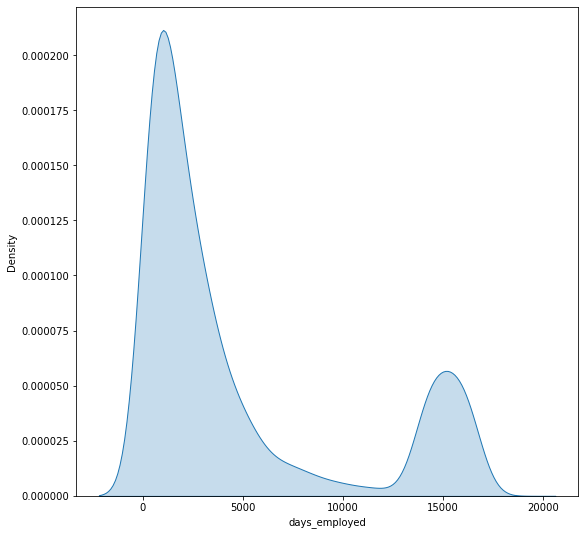

In [21]:
sns.kdeplot(data['days_employed'], fill=True);

Теперь заполним пропуски.

### ЗАПОЛНЕНИЕ ПРОПУСКОВ МЕДИАНОЙ

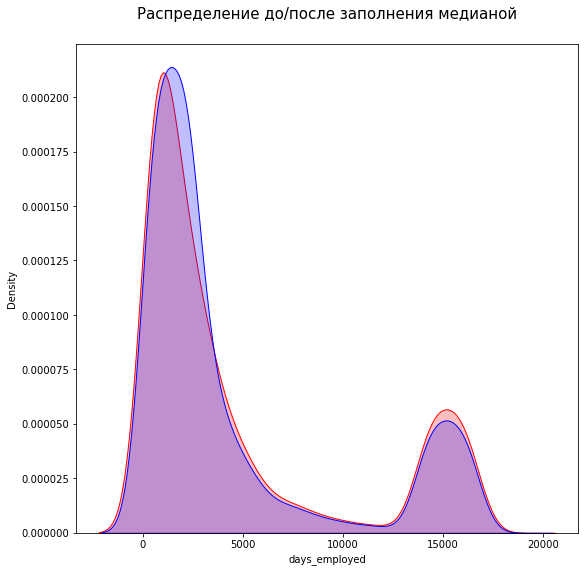

In [22]:
plt.title('Распределение до/после заполнения медианой', pad=25, fontsize=15);
sns.kdeplot(data['days_employed'], color='red', fill=True);
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())
sns.kdeplot(data['days_employed'], color='blue', fill=True);

### ЗАПОЛНЕНИЕ ПРОПУСКОВ KNN

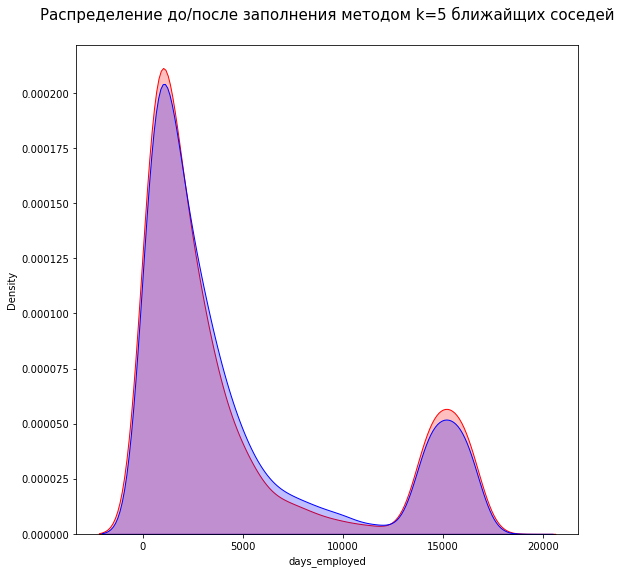

In [23]:
data = backup.copy()

tmp_data = data.select_dtypes(exclude='object').drop('debt', axis=1)

plt.title('Распределение до/после заполнения методом k=5 ближайщих соседей', pad=25, fontsize=15);
sns.kdeplot(data['days_employed'], color='red', fill=True);
data[tmp_data.columns] = pd.DataFrame(knn_imp.fit_transform(tmp_data), columns=tmp_data.columns)
sns.kdeplot(data['days_employed'], color='blue', fill=True);

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  float64
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  float64
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  float64
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 2.0+ MB


Отлично, пропусков нет!

### ДРУГИЕ СТОЛБЦЫ С ПРОПУСКАМИ И АНОМАЛИЯМИ

Теперь разберемся с `'XNA'` в столбце `gender`.

In [25]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0.0,2358.600502,24.0,неоконченное высшее,2.0,гражданский брак,1.0,XNA,компаньон,0,203905.157261,покупка недвижимости


Ничего не обычного. Возможно, просто техническая ошибка, либо человек придерживается прогрессивных взгялядов и не захотел указывать свой гендер, либо это и есть обозначение его гендера. В любом случае такой объект всего один, поэтому на исследование сильного влиянения не окажет. Заменим `'XNA'` на моду.

In [26]:
data['gender'].replace(to_replace=['XNA'], value=data['gender'].mode(), inplace=True)

Проверим на аномалии другие столбцы.

In [27]:
data['children'].unique()

array([ 1.,  0.,  3.,  2., -1.,  4., 20.,  5.])

Концепция отрицательного количества детей, конечно, интересная, но абсолютно нереалистичная. Это ошибка.  
20 детей тоже смотрится аномально.  
Оценим масштаб проблемы.

In [28]:
print(f"Количество людей с -1 ребенком: {data[data['children'] == -1].shape[0]}")

Количество людей с -1 ребенком: 47


In [29]:
print(f"Количество людей с 20 деьми: {data[data['children'] == 20].shape[0]}")

Количество людей с 20 деьми: 76


**ВЫВОД:**  
Слишком много, чтобы быть правдой. Значение 20 также является ошибочным и должно быть заменено.  

**РЕШЕНИЕ:**  
Предположим простейший случай - опечатка. В таком случае значение 20 соответствует более вероятному значению 2, а значение -1 соответствует 1. Так и заменим.

In [30]:
data['children'].replace(to_replace={20: 2, -1: 1}, inplace=True)

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

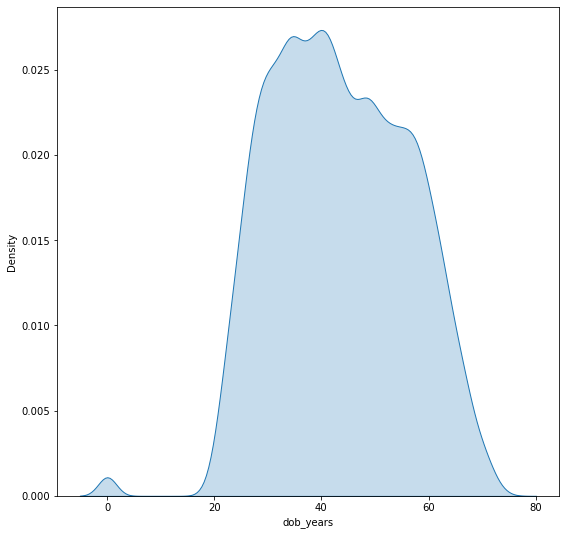

In [31]:
display(data['dob_years'].describe())
sns.kdeplot(data['dob_years'], fill=True);

Могут ли младенцы брать кредит?  
Посмотрим на объекты с возрастом 0.

In [32]:
print(f"Количество людей, которым 0 лет: {data[data['dob_years'] == 0].shape[0]}")

Количество людей, которым 0 лет: 101


In [33]:
data[data['dob_years'] == 0].sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
270,3.0,1872.663186,0.0,среднее,1.0,женат / замужем,0.0,F,сотрудник,0,102166.458894,ремонт жилью
9151,0.0,1551.380402,0.0,высшее,0.0,Не женат / не замужем,4.0,F,сотрудник,0,209621.838920,получение высшего образования
2487,0.0,2497.754414,0.0,среднее,1.0,женат / замужем,0.0,F,сотрудник,1,91367.005172,недвижимость
13439,0.0,1036.644001,0.0,среднее,1.0,женат / замужем,0.0,M,сотрудник,1,271371.522623,операции с жильем
18851,0.0,10637.001569,0.0,среднее,1.0,женат / замужем,0.0,F,госслужащий,0,136537.132625,дополнительное образование
11481,2.0,1611.360609,0.0,среднее,1.0,женат / замужем,0.0,M,сотрудник,0,236698.919494,строительство жилой недвижимости
10364,2.0,1935.402251,0.0,высшее,0.0,в разводе,3.0,F,госслужащий,0,114599.070321,высшее образование
13968,1.0,1018.525283,0.0,среднее,1.0,женат / замужем,0.0,F,сотрудник,1,155341.706429,свой автомобиль
7034,0.0,15252.824210,0.0,высшее,0.0,Не женат / не замужем,4.0,F,пенсионер,0,263121.074528,образование
7252,0.0,368.838194,0.0,высшее,0.0,Не женат / не замужем,4.0,M,сотрудник,0,169507.733337,операции с коммерческой недвижимостью


Люди с возрастом 0 имеют разный трудовой стаж, разное количество детей, разное образование и так далее, поэтому делаю вывод, что 0 это не специальное обозначение для какого-то типа клиентов, например, несовершеннолетних. Предполагаю, что таким образом заполнялись пропуски в этом столбце.  
Вернем пропуски на место и заполним их с помощью KNNImputer.

In [34]:
data['dob_years'].replace(to_replace={0: np.nan}, inplace=True)

In [35]:
backup = data.copy()

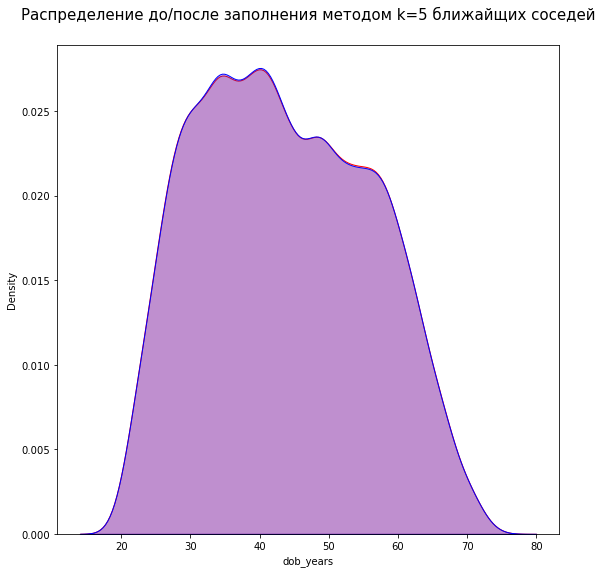

In [36]:
tmp_data = data.select_dtypes(exclude='object').drop('debt', axis=1)

plt.title('Распределение до/после заполнения методом k=5 ближайщих соседей', pad=25, fontsize=15);
sns.kdeplot(data['dob_years'], color='red', fill=True);
data[tmp_data.columns] = pd.DataFrame(knn_imp.fit_transform(tmp_data), columns=tmp_data.columns)
sns.kdeplot(data['dob_years'], color='blue', fill=True);

In [37]:
data['debt'].unique()

array([0, 1], dtype=int64)

Целевой признак в задаче кредитного скоринга. С ним проблем нет.

**ВЫВОД:**  
Таким образом, были найдены и устранены пропуски и аномалии в данных.

### Изменение типов данных.

In [38]:
col_names = data.select_dtypes(exclude=['object']).columns
data.loc[:, col_names] = data.select_dtypes(exclude=['object']).astype('int').apply(pd.to_numeric, downcast='unsigned')
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  uint8 
 1   days_employed     21525 non-null  uint16
 2   dob_years         21525 non-null  uint8 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  uint8 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  uint8 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  uint8 
 10  total_income      21525 non-null  uint32
 11  purpose           21525 non-null  object
dtypes: object(5), uint16(1), uint32(1), uint8(5)
memory usage: 1.0+ MB


None

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Использование памяти сократилось в два раза.

### Удаление дубликатов.

In [39]:
print(f'Количство строк в датафрейме: {data.shape[0]}')
x1 = data.shape[0]
data.drop_duplicates(inplace=True, ignore_index=True)
print(f'Количство строк в датафрейме: {data.shape[0]}')
x2 = data.shape[0]
print(f'Явных дубликатов удалено: {x1-x2}')

Количство строк в датафрейме: 21525
Количство строк в датафрейме: 21471
Явных дубликатов удалено: 54


Сначала удалим явные дубликаты с помощью предназначенного для этого метода `drop_duplicates()`.  

In [40]:
data['education'] = data['education'].str.lower()

Приведем все значения столбца `education` к нижнему регистру

In [41]:
print(f'Количство строк в датафрейме: {data.shape[0]}')
x1 = data.shape[0]
data.drop_duplicates(inplace=True, ignore_index=True)
print(f'Количство строк в датафрейме: {data.shape[0]}')
x2 = data.shape[0]
print(f'Невных дубликатов удалено: {x1-x2}')

Количство строк в датафрейме: 21471
Количство строк в датафрейме: 21454
Невных дубликатов удалено: 17


Теперь неявные дубликаты стали явными, и мы их снова удалили

**ВЫВОД:**  
Предполагаю, что причины появления неявных дубликатов в том, что данные были получены путем слияния нескольких таблиц, в каждой из которых были разные принципы заполнения столбца `education`.  
Явные дубликаты могли появится как при слиянии таблиц из разных источников, так и из-за ошибки программы сбора исходных данных. 

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [42]:
education_dict = data.loc[:, ['education', 'education_id']]
data.drop('education', axis=1, inplace=True)

family_dict = data.loc[:, ['family_status', 'family_status_id']]
data.drop('family_status', axis=1, inplace=True)

In [43]:
education_dict.drop_duplicates(inplace=True, ignore_index=True)
family_dict.drop_duplicates(inplace=True, ignore_index=True)
display(family_dict)
display(education_dict)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [44]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация дохода.

In [45]:
def get_income_category(income):
    try:
        if income <= 30000:
            return 'E'
        if 30000 < income <= 50000:
            return 'D'
        if 50000 < income <= 200000:
            return 'C'
        if 200000 < income <= 1000000:
            return 'B'
        if 1000000 < income:
            return 'A'
    except:
        return 'неверный формат ввода'
    

In [46]:
data['total_income_category'] = data['total_income'].apply(get_income_category)

In [47]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Категоризация целей кредита.

In [48]:
def get_purpose_category(purpose):
    substrings = {'жиль': 'операции с недвижимостью',
                  'автомобил': 'операции с автомобилем',
                  'образов': 'получение образования',
                  'свадьб': 'проведение свадьбы',
                  'недвижимост': 'операции с недвижимостью'}
    try:
        string = purpose.lower()
        for substring in substrings:
            if substring in string:
                return substrings[substring]
    except:
        return 'неверный формат ввода'

In [49]:
data['purpose_category'] = data['purpose'].apply(get_purpose_category)

In [50]:
display(data.head())
data['purpose_category'].unique()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

In [51]:
col_names = data.select_dtypes('object').drop('purpose', axis=1).columns
data.loc[:, col_names] = data[col_names].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   children               21454 non-null  uint8   
 1   days_employed          21454 non-null  uint16  
 2   dob_years              21454 non-null  uint8   
 3   education_id           21454 non-null  uint8   
 4   family_status_id       21454 non-null  uint8   
 5   gender                 21454 non-null  category
 6   income_type            21454 non-null  category
 7   debt                   21454 non-null  uint8   
 8   total_income           21454 non-null  uint32  
 9   purpose                21454 non-null  object  
 10  total_income_category  21454 non-null  category
 11  purpose_category       21454 non-null  category
dtypes: category(4), object(1), uint16(1), uint32(1), uint8(5)
memory usage: 482.9+ KB


Использование памяти сократилось еще в два раза.

### Ответы на вопросы.

#### Вопрос 1:
Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [52]:
default_prob = data[data['debt'] == 1].shape[0] / data.shape[0]
print(f"Вероятность, что случайно выбранный клиент не вернет кредит: {default_prob:.6}")

data_grouped = data.groupby('children', as_index=False).agg({'debt': [np.mean, 'size']}).droplevel(level=0, axis=1)
data_grouped = data_grouped.rename({'': 'children',
                                    'mean': 'risk_level',
                                    'size': 'number_of_clients'}, axis=1).sort_values(by='risk_level', ascending=False)
            

display(data_grouped)

data_pivo = data.pivot_table(values='debt', index='children', aggfunc=['mean', 'count']).droplevel(level=1, axis=1)
data_pivo = data_pivo.rename({'mean': 'risk_level',
                              'count': 'number_of_clients'}, axis=1).sort_values(by='risk_level', ascending=False)
display(data_pivo)

Вероятность, что случайно выбранный клиент не вернет кредит: 0.0811504


,children,risk_level,number_of_clients
4,4,0.097561,41
2,2,0.094925,2128
1,1,0.091658,4855
3,3,0.081818,330
0,0,0.075438,14091
5,5,0.000000,9


,risk_level,number_of_clients
children,,
4,0.097561,41
2,0.094925,2128
1,0.091658,4855
3,0.081818,330
0,0.075438,14091
5,0.000000,9


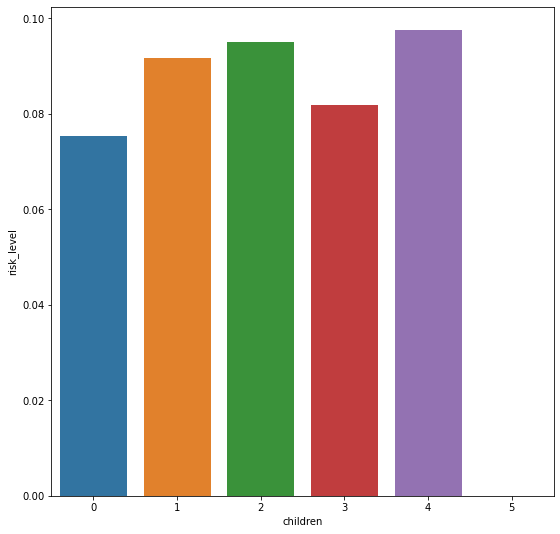

In [53]:
sns.barplot(y='risk_level', x='children', data=data_grouped);

**Вывод:**  
Наблюдается слабая прямая зависимость вероятности невозврата кредита в срок от количества детей.  
Вероятности невозврата кредита для клиентов с разным количеством детей отличаются друг от друга примерно на 2%. Значение для клиентов с пятью детьми в расчет не берем в виду малого количества таких клиентов.

#### Вопрос 2:
Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [54]:
data_grouped = data.groupby('family_status_id', as_index=False).agg({'debt': [np.mean, 'size']}).droplevel(level=0, axis=1)
data_grouped = data_grouped.rename({'': 'family_status',
                                    'mean': 'risk_level',
                                    'size': 'number_of_clients'}, axis=1).sort_values(by='risk_level', ascending=False)

data_grouped['family_status'].replace(to_replace=family_dict['family_status_id'].values,
                                      value=family_dict['family_status'].values,
                                      inplace=True)

data_grouped

,family_status,risk_level,number_of_clients
4,Не женат / не замужем,0.097509,2810
1,гражданский брак,0.093471,4151
0,женат / замужем,0.075452,12339
3,в разводе,0.071130,1195
2,вдовец / вдова,0.065693,959


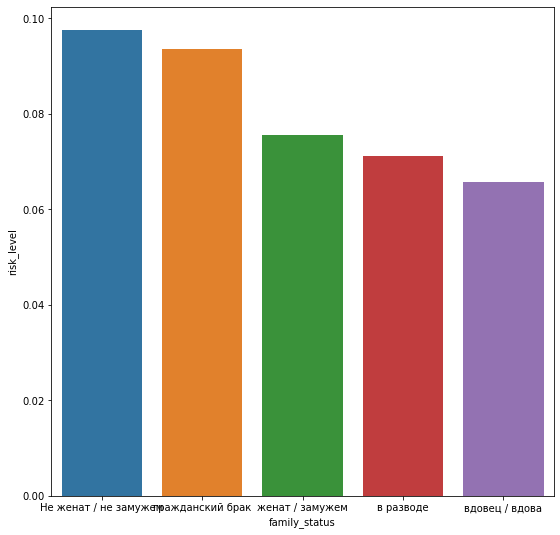

In [55]:
sns.barplot(y='risk_level', x='family_status', data=data_grouped);

**Вывод:**  
Холостые не отдают кредит чаще всего, в то время как люди, в жизни которых был или есть брак, являются более надежными клиентами.

#### Вопрос 3:
Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [56]:
data_grouped = data.groupby('total_income_category', as_index=False).agg({'debt': [np.mean, 'size']}).droplevel(level=0, axis=1)
data_grouped = data_grouped.rename({'': 'total_income',
                                    'mean': 'risk_level',
                                    'size': 'number_of_clients'}, axis=1).sort_values(by='risk_level', ascending=False)

data_grouped['total_income'].replace({'E': '0 – 30 000',
                                      'D': '30 001 – 50 000',
                                      'C': '50 001 – 200 000',
                                      'B': '200 001 – 1 000 000',
                                      'A': '1 000 001 и выше'},
                                      inplace=True)
data_grouped

,total_income,risk_level,number_of_clients
4,0 – 30 000,0.090909,22
2,50 001 – 200 000,0.085116,15567
0,1 000 001 и выше,0.080000,25
1,200 001 – 1 000 000,0.071233,5489
3,30 001 – 50 000,0.059829,351


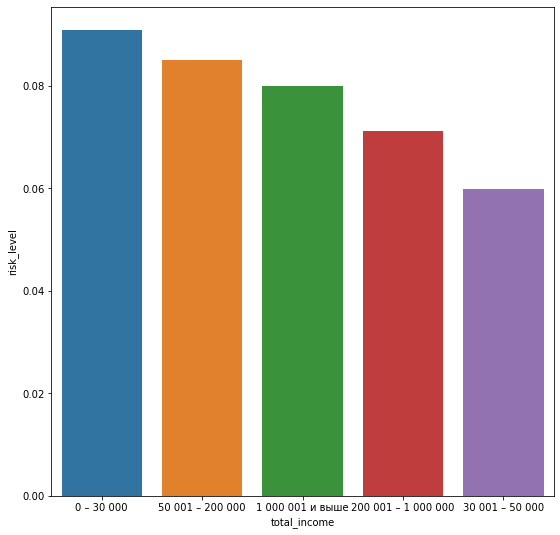

In [57]:
sns.barplot(y='risk_level', x='total_income', data=data_grouped);

**Вывод 3:**  
С увеличением заработка падает вероятность невозврата кредита.  
Интересно, что люди с достатком выше 1 000 000 не отдают кредит чаще, чем люди с зарплатой от 200 000 до 1 000 000. Предполагаю, что такой результат связан с тем, что в выборке мало примеров людей с достатком категории A.  
Аналогичная ситуация с людьми с зарплатой менее 30 000. Ожидается, что они будут не отдавать кредит в срок чаще всех, но по результатам моего исследования они являются самыми надежными клиентам. Также связываю это с нерепрезенетативностью выборки и малым количеством примеров людей с заработком менее 30 000.

#### Вопрос 4:
Как разные цели кредита влияют на его возврат в срок?

In [58]:
data_grouped = data.groupby('purpose_category', as_index=False).agg({'debt': [np.mean, 'size']}).droplevel(level=0, axis=1)
data_grouped = data_grouped.rename({'': 'purpose_category',
                                    'mean': 'risk_level',
                                    'size': 'number_of_clients'}, axis=1).sort_values(by='risk_level', ascending=False)
data_grouped

,purpose_category,risk_level,number_of_clients
0,операции с автомобилем,0.093590,4306
2,получение образования,0.092200,4013
3,проведение свадьбы,0.080034,2324
1,операции с недвижимостью,0.072334,10811


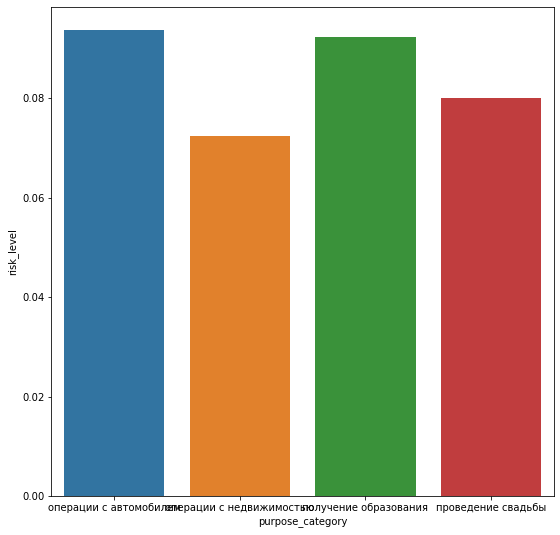

In [59]:
sns.barplot(y='risk_level', x='purpose_category', data=data_grouped);

**Вывод 4:**  
Наиболее ненадежными являются заемщики, целью которых являются операции с автомобилями и получение образование, в то время как люди, берущие кредит на свадьбу и недвижимость, отдают его чаще среднего.

## Общий вывод:

В предоставленном датасете имеются следующие проблемы:
1) Пропуски в столбце с трудовым стажем всегда соответствуют пропускам в столбце с ежемесячным заработком;  
2) Отсутствует единообразие сбора информации об уровне образования, что приводит к появлению неявных дубликатов;  
3) Трудовой стаж расчитывается с ошибкой. Для некоторых клиентов он отрицательный, а для некоторых расчитан не в тех единицах измерения (часы вместо дней);  
4) Присутствуют маловероятные, предположительно, ошибочные значения в столбцах с количеством детей (20 и -1) и возрастом (0);  
5) В данных имеется проблема с явными дубликатами.  
  
После устранения указанных выше проблем удалось получить следующие результаты:
1) При помощи использования более удачных типов данных удалось сократить использование памяти более чем в 4 раза;  
2) Найдены и показаны зависимости невозврата кредита от некоторых характеристик клиента: с увеличенм количества детей в семье растет риск невозврата кредита, а люди никогда не бывшие в браке отдают кредит в срок реже женатых (замужних), разведенных и вдов (вдовцов);  
3) Данные готовы для использования при построении модели кредитного скоринга.